In [8]:
import pygrib
import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path
import re
from datetime import datetime, timedelta
import sys
import glob

In [13]:
grbs = pygrib.open('output/A_YXGR01ECMC051200_C_ECMF_20240205120000_D1S02051200020513001.bin')

In [19]:
grb = grbs.select(shortName='t',level=600)

In [9]:
grbs =pygrib.open('/mnt/data/input/ecmwf_v2/unzipped/2024/02/17/A_YXGR21ECMA170000_C_ECMF_20240217000000_D1S02170000021721001.bin')

In [10]:
grb = [x for x in grbs]

In [11]:
itime = grb[0].analDate 

In [12]:
import pandas as pd
from datetime import timedelta
timestep = pd.date_range(start=itime + timedelta(hours=1), periods=90, freq='H')
timestep2 = pd.date_range(start=timestep[-1] + timedelta(hours=3), periods=18, freq='3H')
timestep3 = pd.date_range(start=timestep2[-1] + timedelta(hours=3), periods=16, freq='6H')

In [13]:
import numpy as np
timestep = np.concatenate((timestep, timestep2, timestep3), axis=None)

In [60]:
len(timestep)

124

In [15]:
len(timestep2)

18

In [13]:
outbin = Path('/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output')
files = glob.glob(f"{outbin}/*.bin")

In [14]:
grbsbulk = [pygrib.open(f) for f in files]
grbsel = [f.select(typeOfLevel="isobaricInhPa") for f in grbsbulk]

In [27]:
grbsel[0][0].values

array([[ 6.71589661,  6.87214661,  6.87214661, ..., -8.03410339,
        -7.78410339, -7.56535339],
       [ 6.52839661,  6.46589661,  6.24714661, ..., -8.53410339,
        -8.25285339, -8.03410339],
       [ 6.52839661,  6.55964661,  6.49714661, ..., -9.25285339,
        -8.90910339, -8.56535339],
       ...,
       [12.21589661, 11.96589661, 11.71589661, ..., -3.97160339,
        -4.31535339, -4.50285339],
       [11.87214661, 11.65339661, 11.40339661, ..., -2.87785339,
        -3.34660339, -3.75285339],
       [11.55964661, 11.34089661, 11.09089661, ..., -1.81535339,
        -2.09660339, -2.50285339]])

In [6]:
grbs.seek(0)
d=grbs.select(typeOfLevel='isobaricInhPa')

In [7]:
len(d)

118

In [68]:
itime = d[0].analDate + timedelta(hours=1)

In [69]:
lats, lons = d[0].latlons()

In [70]:
lats, lons = d[0].latlons()
lats, lons = lats[:,0], lons[0,:]
timestep = pd.date_range(start=itime, periods=90, freq='H')
levels = [ 100.,  150.,  200.,  250.,  300.,  400.,  500.,  600.,  700., 800.,  850.,  900.,  925.,  950., 1000.]
ds4 = xr.Dataset(coords=dict(
        lon=(["lon"], lons),
        lat=(["lat"], lats),
        level=(["level"], levels),
        time=(["time"],timestep)))

In [71]:
varname = d[0].shortName
onlev = float(d[0].level)
# fct = d[0].validDate invalid fcttime

In [120]:
ds4[varname]=(('time','level','lon','lat'),np.empty((len(timestep),len(levels),len(lons),len(lats))))
ds4[varname][:,:,:,:] = np.nan

In [121]:
ds4[varname]

<xarray.DataArray 'z' (time: 90, level: 15, lon: 801, lat: 521)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * lon      (lon) float64 70.0 70.12 70.25 70.38 ... 169.6 169.8 169.9 170.0
  * lat      (lat) float64 40.0 39.88 39.75 39.62 ... -24.62 -24.75 -24.88 -25.0
  * level    (level) float64 100.0 150.0 200.0 250.0 ... 900.0 925.0 950.0 1e+03
  * time     (time) datetime64[ns] 2024-02-04T13:00:00 ... 2024-02-08T06:00:00

In [110]:
data = d[0].values
data = np.reshape(data.T,(len(lons),len(lats)))

In [122]:
ds4[varname].loc[dict(time=timestep[0], level=100)] = data

In [123]:
ds4[varname][0,0,0,:] == d[0].values[:,0]

<xarray.DataArray 'z' (lat: 521)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])
Coordinates:
    lon      float64 70.0
  * lat      (lat) float64 40.0 39.88 39.75 39.62 ... -24.62 -24.75 -24.88 -25.0
    level    float64 100.0
    time     datetime64[ns] 2024-02-04T13:00:00

In [124]:
ds4[varname]

<xarray.DataArray 'z' (time: 90, level: 15, lon: 801, lat: 521)>
array([[[[14834.63671875, 14830.76171875, 14811.32421875, ...,
          14619.76171875, 14621.26171875, 14620.57421875],
         [14837.38671875, 14821.38671875, 14804.07421875, ...,
          14619.51171875, 14620.07421875, 14618.44921875],
         [14846.19921875, 14842.63671875, 14834.57421875, ...,
          14621.32421875, 14619.63671875, 14616.44921875],
         ...,
         [13112.38671875, 13140.38671875, 13166.51171875, ...,
          14786.63671875, 14790.69921875, 14797.26171875],
         [13114.26171875, 13143.88671875, 13170.07421875, ...,
          14786.82421875, 14791.57421875, 14798.32421875],
         [13117.07421875, 13145.38671875, 13171.13671875, ...,
          14787.07421875, 14792.69921875, 14799.44921875]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
...
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]]]])
Coordinates:
  * lon      (lon) float64 70.0 70.12 70.25 70.38 ... 169.6 169.8 169.9 170.0
  * lat      (lat) float64 40.0 39.88 39.75 39.62 ... -24.62 -24.75 -24.88 -25.0
  * level    (level) float64 100.0 150.0 200.0 250.0 ... 900.0 925.0 950.0 1e+03
  * time     (time) datetime64[ns] 2024-02-04T13:00:00 ... 2024-02-08T06:00:00

In [175]:
u[0].shortName

'u'

In [90]:
u[0].shortName

'u'

In [81]:
levels = [grb.level for grb in grbs]
grbs.seek(0)
# Sort GRIB messages by level
sorted_grbs = [grb for _, grb in sorted(zip(levels, grbs))] 

TypeError: '<' not supported between instances of 'pygrib._pygrib.gribmessage' and 'pygrib._pygrib.gribmessage'

In [82]:
grbs

In [92]:
grbs.seek(0,from_what=0)
# grb1 = grbs.read(25)[0:50] # read returns a list with the next N (N=1 in this case) messages.
# grb1

In [93]:
grbs.seek(0)

In [94]:
descr = []
for grb in grbs:
    descr.append(str(grb).split(':'))
df = pd.DataFrame(
    descr, 
    columns=['id', 'name', 'unit', 'spacing', 'layer', 'level', 'hour', 'run_dt'])
df.level.unique()

array(['level 0', 'level 1000', 'level 300', 'level 850', 'level 700',
       'level 400', 'level 925', 'level 200', 'level 150', 'level 500',
       'level 100', 'level 250', 'level 800', 'level 950', 'level 900',
       'level 600', 'level 0 -'], dtype=object)

In [143]:
level = [li[5:] for li in df.level.unique()]

In [146]:
level = level[1:-1]

In [147]:
level = np.array(level)
level =level.astype(np.float)

<ipython-input-147-6c9035732b78>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  level =level.astype(np.float)


In [156]:
vtime = grb.valid

RuntimeError: b'Key/value not found'

In [176]:
ds4

<xarray.Dataset>
Dimensions:     (latitude: 521, longitude: 801, valid_time: 90)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2024-02-04T12:00:00
    step        (valid_time) timedelta64[ns] 3 days 18:00:00 ... 3 days 17:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 40.0 39.88 39.75 ... -24.75 -24.88 -25.0
  * longitude   (longitude) float64 70.0 70.12 70.25 70.38 ... 169.8 169.9 170.0
  * valid_time  (valid_time) datetime64[ns] 2024-02-08T06:00:00 ... 2024-02-0...
Data variables:
    sund        (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    cape        (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    mcc         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    lsp         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    lcc         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    cp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    hcc         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    v100        (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    sst         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    u100        (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    tcc         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    p3020       (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    sp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    msl         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    d2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    z           (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    cbh         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    gh          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    deg0l       (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    blh         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    fg10        (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    cin         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    fzra        (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
    sro         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 521, 801), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-02-05T14:41 GRIB to CD

In [62]:
df.name.unique()

array(['Large-scale precipitation', 'High cloud cover',
       'U component of wind', 'V component of wind', 'Geopotential',
       'Geopotential height', '10 metre V wind component',
       'Medium cloud cover', 'Convective precipitation',
       'Low cloud cover', '100 metre U wind component', 'Temperature',
       'Total cloud cover', 'Convective available potential energy',
       '100 metre V wind component', 'Relative humidity',
       'Total precipitation', 'Surface pressure',
       'Mean sea level pressure', 'Sea surface temperature',
       '2 metre dewpoint temperature', '10 metre U wind component',
       '2 metre temperature', 'Visibility', 'Vertical velocity',
       'Boundary layer height', 'Cloud base height',
       '0 degrees C isothermal level (atm)',
       '10 metre wind gust since previous post-processing',
       'Specific humidity', 'Convective inhibition', 'K index',
       'Divergence', 'Potential vorticity', 'Accumulated freezing rain',
       'Surface runoff

In [23]:
short_names = [grb.shortName for grb in isobar]  

# Print the list
np.unique(short_names)

array(['d', 'gh', 'pv', 'q', 'r', 't', 'u', 'v', 'w', 'z'], dtype='<U2')

In [3]:
outbin = Path('/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output')

In [6]:
ds4 = xr.open_mfdataset(tes, engine="cfgrib",
        backend_kwargs=dict(filter_by_keys={"typeOfLevel": "surface", 'edition': 1}),
        concat_dim='valid_time', combine='nested', parallel= True)

Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR12ECMC041200_C_ECMF_20240204120000_D1S02041200020500001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR86ECMC041200_C_ECMF_20240204120000_D1S02041200020802001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR24ECMC041200_C_ECMF_20240204120000_D1S02041200020512001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR77ECMC041200_C_ECMF_20240204120000_D1S02041200020717001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR82ECMC041200_C_ECMF_20240204120000_D1S02041200020722001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/

Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR75ECMC041200_C_ECMF_20240204120000_D1S02041200020715001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR53ECMC041200_C_ECMF_20240204120000_D1S02041200020617001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR08ECMC041200_C_ECMF_20240204120000_D1S02041200020420001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR09ECMC041200_C_ECMF_20240204120000_D1S02041200020421001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/ecmwf/output/A_YXGR38ECMC041200_C_ECMF_20240204120000_D1S02041200020602001.bin.923a8.idx' older than GRIB file
Ignoring index file '/home/opn/script/siam-netcdf-generator/

In [165]:
timestep = pd.date_range(start=datetime.utcnow(), periods=90, freq='H')

In [166]:
timestep[0]

Timestamp('2024-02-05 08:58:58.525771', freq='H')

In [19]:
import pygrib as pg

In [26]:
dstemp = xr.open_mfdataset('/mnt/data/input/ecmwf_v2/unzipped/2024/02/17/*.bin', engine="cfgrib",
                            backend_kwargs=dict(filter_by_keys={"shortName":'u','typeOfLevel': 'isobaricInhPa'}),
                            concat_dim='valid_time', combine='nested', parallel=True)

In [27]:
dstemp = dstemp.sortby("valid_time")

In [29]:
dstemp.valid_time

<xarray.DataArray 'valid_time' (valid_time: 124)>
array(['2024-02-17T01:00:00.000000000', '2024-02-17T02:00:00.000000000',
       '2024-02-17T03:00:00.000000000', '2024-02-17T04:00:00.000000000',
       '2024-02-17T05:00:00.000000000', '2024-02-17T06:00:00.000000000',
       '2024-02-17T07:00:00.000000000', '2024-02-17T08:00:00.000000000',
       '2024-02-17T09:00:00.000000000', '2024-02-17T10:00:00.000000000',
       '2024-02-17T11:00:00.000000000', '2024-02-17T12:00:00.000000000',
       '2024-02-17T13:00:00.000000000', '2024-02-17T14:00:00.000000000',
       '2024-02-17T15:00:00.000000000', '2024-02-17T16:00:00.000000000',
       '2024-02-17T17:00:00.000000000', '2024-02-17T18:00:00.000000000',
       '2024-02-17T19:00:00.000000000', '2024-02-17T20:00:00.000000000',
       '2024-02-17T21:00:00.000000000', '2024-02-17T22:00:00.000000000',
       '2024-02-17T23:00:00.000000000', '2024-02-18T00:00:00.000000000',
       '2024-02-18T01:00:00.000000000', '2024-02-18T02:00:00.000000000',
       '2024-02-18T03:00:00.000000000', '2024-02-18T04:00:00.000000000',
       '2024-02-18T05:00:00.000000000', '2024-02-18T06:00:00.000000000',
       '2024-02-18T07:00:00.000000000', '2024-02-18T08:00:00.000000000',
       '2024-02-18T09:00:00.000000000', '2024-02-18T10:00:00.000000000',
       '2024-02-18T11:00:00.000000000', '2024-02-18T12:00:00.000000000',
       '2024-02-18T13:00:00.000000000', '2024-02-18T14:00:00.000000000',
       '2024-02-18T15:00:00.000000000', '2024-02-18T16:00:00.000000000',
       '2024-02-18T17:00:00.000000000', '2024-02-18T18:00:00.000000000',
       '2024-02-18T19:00:00.000000000', '2024-02-18T20:00:00.000000000',
       '2024-02-18T21:00:00.000000000', '2024-02-18T22:00:00.000000000',
       '2024-02-18T23:00:00.000000000', '2024-02-19T00:00:00.000000000',
       '2024-02-19T01:00:00.000000000', '2024-02-19T02:00:00.000000000',
       '2024-02-19T03:00:00.000000000', '2024-02-19T04:00:00.000000000',
       '2024-02-19T05:00:00.000000000', '2024-02-19T06:00:00.000000000',
       '2024-02-19T07:00:00.000000000', '2024-02-19T08:00:00.000000000',
       '2024-02-19T09:00:00.000000000', '2024-02-19T10:00:00.000000000',
       '2024-02-19T11:00:00.000000000', '2024-02-19T12:00:00.000000000',
       '2024-02-19T13:00:00.000000000', '2024-02-19T14:00:00.000000000',
       '2024-02-19T15:00:00.000000000', '2024-02-19T16:00:00.000000000',
       '2024-02-19T17:00:00.000000000', '2024-02-19T18:00:00.000000000',
       '2024-02-19T19:00:00.000000000', '2024-02-19T20:00:00.000000000',
       '2024-02-19T21:00:00.000000000', '2024-02-19T22:00:00.000000000',
       '2024-02-19T23:00:00.000000000', '2024-02-20T00:00:00.000000000',
       '2024-02-20T01:00:00.000000000', '2024-02-20T02:00:00.000000000',
       '2024-02-20T03:00:00.000000000', '2024-02-20T04:00:00.000000000',
       '2024-02-20T05:00:00.000000000', '2024-02-20T06:00:00.000000000',
       '2024-02-20T07:00:00.000000000', '2024-02-20T08:00:00.000000000',
       '2024-02-20T09:00:00.000000000', '2024-02-20T10:00:00.000000000',
       '2024-02-20T11:00:00.000000000', '2024-02-20T12:00:00.000000000',
       '2024-02-20T13:00:00.000000000', '2024-02-20T14:00:00.000000000',
       '2024-02-20T15:00:00.000000000', '2024-02-20T16:00:00.000000000',
       '2024-02-20T17:00:00.000000000', '2024-02-20T18:00:00.000000000',
       '2024-02-20T21:00:00.000000000', '2024-02-21T00:00:00.000000000',
       '2024-02-21T03:00:00.000000000', '2024-02-21T06:00:00.000000000',
       '2024-02-21T09:00:00.000000000', '2024-02-21T12:00:00.000000000',
       '2024-02-21T15:00:00.000000000', '2024-02-21T18:00:00.000000000',
       '2024-02-21T21:00:00.000000000', '2024-02-22T00:00:00.000000000',
       '2024-02-22T03:00:00.000000000', '2024-02-22T06:00:00.000000000',
       '2024-02-22T09:00:00.000000000', '2024-02-22T12:00:00.000000000',
       '2024-02-22T15:00:00.000000000', '2024-02-22T18:00:00.000000000',
       '2024-02-22T21:00:00.000000000', '2024-02-23T00:00:00.000000000',
       '

In [20]:
grbs = pg.open('/mnt/data/input/ecmwf_v2/unzipped/2024/02/17/A_YXGR32ECMA170000_C_ECMF_20240217000000_D1S02170000021808001.bin')

In [2]:
import xarray as xr

In [40]:
grb[0].validityTime

800

In [6]:
ds = xr.open_dataset('/mnt/data/output/ECMWF_V2/2024/02/ecmwf_20240217_1200.nc')

In [7]:
ds['time']

<xarray.DataArray 'time' (time: 124)>
array(['2024-02-17T01:00:00.000000000', '2024-02-17T02:00:00.000000000',
       '2024-02-17T03:00:00.000000000', '2024-02-17T04:00:00.000000000',
       '2024-02-17T05:00:00.000000000', '2024-02-17T06:00:00.000000000',
       '2024-02-17T07:00:00.000000000', '2024-02-17T08:00:00.000000000',
       '2024-02-17T09:00:00.000000000', '2024-02-17T10:00:00.000000000',
       '2024-02-17T11:00:00.000000000', '2024-02-17T12:00:00.000000000',
       '2024-02-17T13:00:00.000000000', '2024-02-17T14:00:00.000000000',
       '2024-02-17T15:00:00.000000000', '2024-02-17T16:00:00.000000000',
       '2024-02-17T17:00:00.000000000', '2024-02-17T18:00:00.000000000',
       '2024-02-17T19:00:00.000000000', '2024-02-17T20:00:00.000000000',
       '2024-02-17T21:00:00.000000000', '2024-02-17T22:00:00.000000000',
       '2024-02-17T23:00:00.000000000', '2024-02-18T00:00:00.000000000',
       '2024-02-18T01:00:00.000000000', '2024-02-18T02:00:00.000000000',
       '2024-02-18T03:00:00.000000000', '2024-02-18T04:00:00.000000000',
       '2024-02-18T05:00:00.000000000', '2024-02-18T06:00:00.000000000',
       '2024-02-18T07:00:00.000000000', '2024-02-18T08:00:00.000000000',
       '2024-02-18T09:00:00.000000000', '2024-02-18T10:00:00.000000000',
       '2024-02-18T11:00:00.000000000', '2024-02-18T12:00:00.000000000',
       '2024-02-18T13:00:00.000000000', '2024-02-18T14:00:00.000000000',
       '2024-02-18T15:00:00.000000000', '2024-02-18T16:00:00.000000000',
       '2024-02-18T17:00:00.000000000', '2024-02-18T18:00:00.000000000',
       '2024-02-18T19:00:00.000000000', '2024-02-18T20:00:00.000000000',
       '2024-02-18T21:00:00.000000000', '2024-02-18T22:00:00.000000000',
       '2024-02-18T23:00:00.000000000', '2024-02-19T00:00:00.000000000',
       '2024-02-19T01:00:00.000000000', '2024-02-19T02:00:00.000000000',
       '2024-02-19T03:00:00.000000000', '2024-02-19T04:00:00.000000000',
       '2024-02-19T05:00:00.000000000', '2024-02-19T06:00:00.000000000',
       '2024-02-19T07:00:00.000000000', '2024-02-19T08:00:00.000000000',
       '2024-02-19T09:00:00.000000000', '2024-02-19T10:00:00.000000000',
       '2024-02-19T11:00:00.000000000', '2024-02-19T12:00:00.000000000',
       '2024-02-19T13:00:00.000000000', '2024-02-19T14:00:00.000000000',
       '2024-02-19T15:00:00.000000000', '2024-02-19T16:00:00.000000000',
       '2024-02-19T17:00:00.000000000', '2024-02-19T18:00:00.000000000',
       '2024-02-19T19:00:00.000000000', '2024-02-19T20:00:00.000000000',
       '2024-02-19T21:00:00.000000000', '2024-02-19T22:00:00.000000000',
       '2024-02-19T23:00:00.000000000', '2024-02-20T00:00:00.000000000',
       '2024-02-20T01:00:00.000000000', '2024-02-20T02:00:00.000000000',
       '2024-02-20T03:00:00.000000000', '2024-02-20T04:00:00.000000000',
       '2024-02-20T05:00:00.000000000', '2024-02-20T06:00:00.000000000',
       '2024-02-20T07:00:00.000000000', '2024-02-20T08:00:00.000000000',
       '2024-02-20T09:00:00.000000000', '2024-02-20T10:00:00.000000000',
       '2024-02-20T11:00:00.000000000', '2024-02-20T12:00:00.000000000',
       '2024-02-20T13:00:00.000000000', '2024-02-20T14:00:00.000000000',
       '2024-02-20T15:00:00.000000000', '2024-02-20T16:00:00.000000000',
       '2024-02-20T17:00:00.000000000', '2024-02-20T18:00:00.000000000',
       '2024-02-20T21:00:00.000000000', '2024-02-21T00:00:00.000000000',
       '2024-02-21T03:00:00.000000000', '2024-02-21T06:00:00.000000000',
       '2024-02-21T09:00:00.000000000', '2024-02-21T12:00:00.000000000',
       '2024-02-21T15:00:00.000000000', '2024-02-21T18:00:00.000000000',
       '2024-02-21T21:00:00.000000000', '2024-02-22T00:00:00.000000000',
       '2024-02-22T03:00:00.000000000', '2024-02-22T06:00:00.000000000',
       '2024-02-22T09:00:00.000000000', '2024-02-22T12:00:00.000000000',
       '2024-02-22T15:00:00.000000000', '2024-02-22T18:00:00.000000000',
       '2024-02-22T21:00:00.000000000', '2024-02-23T00:00:00.000000000',
       '2024-02-23T0

In [21]:
data_newcoord = ds.assign_coords(time=timestep)
# data_expanded = data_newcoord.expand_dims('truetime')

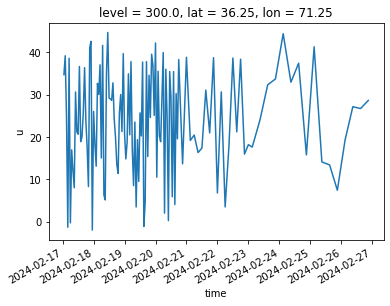

In [25]:
data_newcoord['u'][:,10,30,10].plot()

In [17]:
data_newcoord.swap_dims({'time':'truetime'})

ValueError: replacement dimension 'truetime' is not a 1D variable along the old dimension 'time'

In [28]:
dsl = xr.open_dataset('/mnt/data/output/ECMWF_V2/2024/02/ecmwf_20240211_0000.nc')

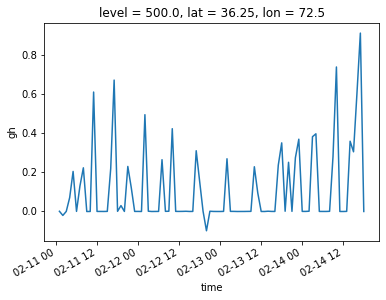

In [39]:
dsl['gh'][:,6,30,20].plot()

In [3]:
import xarray as xr
import numpy as np
ds4 = xr.open_mfdataset('output/*.bin', engine="cfgrib",
    backend_kwargs=dict(filter_by_keys={"shortName":'u'}),
    concat_dim='valid_time', combine='nested', parallel=True)
lats, lons = ds4['latitude'].values, ds4['longitude'].values

In [38]:
ds4

,Array,Chunk
Bytes,1.54 GiB,17.51 MiB
Shape,"(90, 11, 521, 801)","(1, 11, 521, 801)"
Count,360 Tasks,90 Chunks
Type,float32,numpy.ndarray


In [19]:
lt = len(ds4['valid_time'])
llon = len(ds4['longitude'])
llat =len(ds4['latitude'])
llev =len(ds4['isobaricInhPa'])

In [27]:
dumdum = np.empty((lt,1,llat,llon))
dumdum[:,:,:,:] = np.nan

In [8]:
val = ds4['u'].values

In [21]:
np.shape(dumdum)

(90, 11, 521, 801)

In [ ]:
np.concatenate((first_part, np.expand_dims(new_array, axis=1), second_part), axis=1)

In [17]:
# + val[:,1:2,:,:] + [dumdum] + val[:,2:3,:,:] + [dumdum] + val[:,3:4,:,:] + [dumdum]
new_arr = np.empty
new_arr.append(val[:,0:1,:,:])

In [18]:
np.shape(new_arr)

(1, 90, 1, 521, 801)

In [36]:
new_val = np.concatenate((val[:,0:1,:,:], dumdum, val[:,1:2,:,:], dumdum, val[:,2:3,:,:], dumdum, val[:,3:4,:,:], dumdum,val[:,4:,:,:] ), axis=1)

In [37]:
np.shape(new_val)

(90, 15, 521, 801)

In [16]:
np.shape(new_val)

(90, 90, 521, 801)

In [64]:
np.shape(dumdum)

(90, 801, 521)

In [81]:
 #Original multidimensional array
original_array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# New array to insert
new_array = [10, 11, 12]

# Index to insert the new array
index_to_insert = 1

# Split the original array at the index
first_part = original_array[:index_to_insert]
second_part = original_array[index_to_insert:]

# Insert the new array between the split parts
updated_array = first_part + [new_array] + second_part

# Print the updated array
print(updated_array)

[[1, 2, 3], [10, 11, 12], [4, 5, 6], [7, 8, 9]]
